<a href="https://colab.research.google.com/github/hasanzeynal/Tensorflow-Developer-Certificate/blob/main/01_Neural_Network_Regression_in_TensorFlow/neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Network in TensorFlow

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
#ignore all warnings
import warnings
warnings.filterwarnings('ignore')

# Basic Neural Network Model for Regression Problem
Then, After building our basic NN model, we are gonna try:
* improving our model
* evaluating
* setting
* saving
* loading
* processing with feature scalling(normalising, fitting model on a scaled data)

## Building Basic Model in TensorFlow

## Creating Data, So we can model it

In [3]:
X = tf.constant([-1,1,3,5,7,9,11,13,15,17,19,21,23])
y = tf.constant([9,11,13,15,17,19,21,23,25,27,29,31,33])  #the difference between X and y is 10

In [4]:
#looking for the input and output shape
X.shape,y.shape  #just we are gonna need comma in the tensoor shape after 14 so shape is (14,)

(TensorShape([13]), TensorShape([13]))

### Steps in Modelling in TensorFlow.
1. **Creating Model** - define imput, output, hidden layers of our Deep Learning Model.

2. **Compiling Model** - define the loss function(the function which tell us how wrong our model is), define optimizer(which tell us our model how improve) and evaluation metrics(we can use to interpret the performance of our model).

3. Fitting Model - letting the model try to find patterns between X and y(features and labels)

In [5]:
#change 1 rank tensoir to the 2 rank tensor
tf.expand_dims(X,-1)

<tf.Tensor: shape=(13, 1), dtype=int32, numpy=
array([[-1],
       [ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21],
       [23]], dtype=int32)>

In [6]:
#creating model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1)
])
#adding dense layer with the 1 neuron
#model.add(tf.keras.layers.Dense(1, input_shape = (14,)))
#model.add(tf.keras.layers.Dense(1))

#compiling the model
model.compile(loss= tf.keras.losses.mae,  #MAE stands for the Mean Absolute Error
              optimizer= tf.keras.optimizers.SGD(), #SGD stands for the Stochastic Gradient Error
              metrics= ['mae'])

#fitting the model
model.fit(tf.expand_dims(X,axis = -1), y, epochs= 5)  #axis= -1 makes 2 rank tensor,1 rank tensor is caused an error

Epoch 1/5
1/1 [==============================] - 5s 5s/step - loss: 19.0312 - mae: 19.0312
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 17.8112 - mae: 17.8112
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 16.5912 - mae: 16.5912
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 15.3712 - mae: 15.3712
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.1512 - mae: 14.1512


In [7]:
#trying make prediction based on X for y
model.predict([25])     #if our model is good enough, the answer would be around 35

1/1 [==============================] - 0s 76ms/step


array([[18.274584]], dtype=float32)

## Improving our model

### Creating new model to improve our result

In [8]:
from sklearn.model_selection import train_test_split
import numpy as np
X = np.array(X)
y = np.array(y)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size = 0.2,random_state = True)

In [9]:
#create a model(specified to your probelm)
improved_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(1)
])

#compile model
improved_model.compile(loss = tf.keras.losses.mae,
                       optimizer = tf.keras.optimizers.Adam(lr = 0.0001),
                       metrics = ['mae'])

#fit the model with the subset of X and y and 100 epochs
improved_model.fit(tf.expand_dims(X_train,axis= 1),y_train,epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 21.7941 - mae: 21.7941
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 21.0671 - mae: 21.0671
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 20.3471 - mae: 20.3471
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 19.6360 - mae: 19.6360
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 18.9471 - mae: 18.9471
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 18.2710 - mae: 18.2710
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 17.5881 - mae: 17.5881
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 16.8985 - mae: 16.8985
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 16.1983 - mae: 16.1983
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 15.4872 - mae: 15.4872
Epoch 11/100
1/1 [==============================] -

In [10]:
#let's see the result by doing prediction in the same way as we did before on 'model'
improved_model.predict([21])     #so much closer as you see, better and more usefull

1/1 [==============================] - 0s 72ms/step


array([[32.81492]], dtype=float32)

### See if we even can do more changes to get more better predictions


In [11]:
#create the model with extra hidden layer(100 hidden units)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),
    tf.keras.layers.Dense(100,activation = 'relu'),   #1 hidden layer is added with 100 hidden units
    tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr = 0.0001),   #lr is changed
              metrics = ['mae'])

#fit the model
model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 150)  #number of epochs is changed

Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 22.7001 - mae: 22.7001
Epoch 2/150
1/1 [==============================] - 0s 21ms/step - loss: 21.9937 - mae: 21.9937
Epoch 3/150
1/1 [==============================] - 0s 16ms/step - loss: 21.3347 - mae: 21.3347
Epoch 4/150
1/1 [==============================] - 0s 14ms/step - loss: 20.7016 - mae: 20.7016
Epoch 5/150
1/1 [==============================] - 0s 12ms/step - loss: 20.0744 - mae: 20.0744
Epoch 6/150
1/1 [==============================] - 0s 12ms/step - loss: 19.4310 - mae: 19.4310
Epoch 7/150
1/1 [==============================] - 0s 11ms/step - loss: 18.7590 - mae: 18.7590
Epoch 8/150
1/1 [==============================] - 0s 12ms/step - loss: 18.0760 - mae: 18.0760
Epoch 9/150
1/1 [==============================] - 0s 11ms/step - loss: 17.3918 - mae: 17.3918
Epoch 10/150
1/1 [==============================] - 0s 11ms/step - loss: 16.6708 - mae: 16.6708
Epoch 11/150
1/1 [==============================] -

In [12]:
#making prediction again
model.predict([21])     #a litle bit better rather than our second model and way much better than first model

1/1 [==============================] - 0s 164ms/step


array([[31.906422]], dtype=float32)

## Evaluating Model
When it comes to the evaluation, there are 3 words you should memorize:

> "Visualize, Visualize, Visualize"

In [13]:
#make a bigger dataset
X = tf.range(-200,300,10)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-200, -190, -180, -170, -160, -150, -140, -130, -120, -110, -100,
        -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,    0,   10,
         20,   30,   40,   50,   60,   70,   80,   90,  100,  110,  120,
        130,  140,  150,  160,  170,  180,  190,  200,  210,  220,  230,
        240,  250,  260,  270,  280,  290], dtype=int32)>

In [14]:
y = X + 15
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-185, -175, -165, -155, -145, -135, -125, -115, -105,  -95,  -85,
        -75,  -65,  -55,  -45,  -35,  -25,  -15,   -5,    5,   15,   25,
         35,   45,   55,   65,   75,   85,   95,  105,  115,  125,  135,
        145,  155,  165,  175,  185,  195,  205,  215,  225,  235,  245,
        255,  265,  275,  285,  295,  305], dtype=int32)>

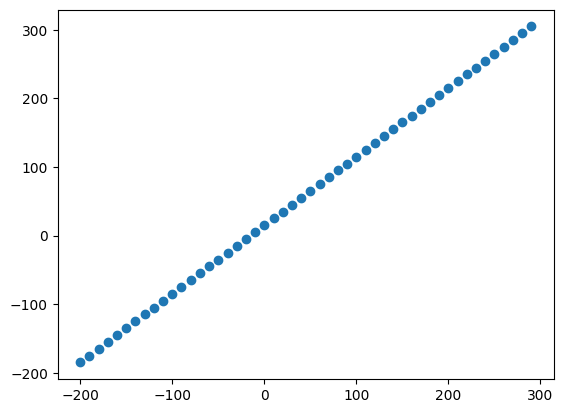

In [15]:
#visualize data
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

### 3 sets....
* Train Test
* Validation Test
* Test Set


In [16]:
#split X to the train and test set
X_train = X[:40]
X_test = X[40:]
#split y too
y_train = y[:40]
y_test = y[40:]

### Visulising dataset
Now we have got our data in the training and test datasets

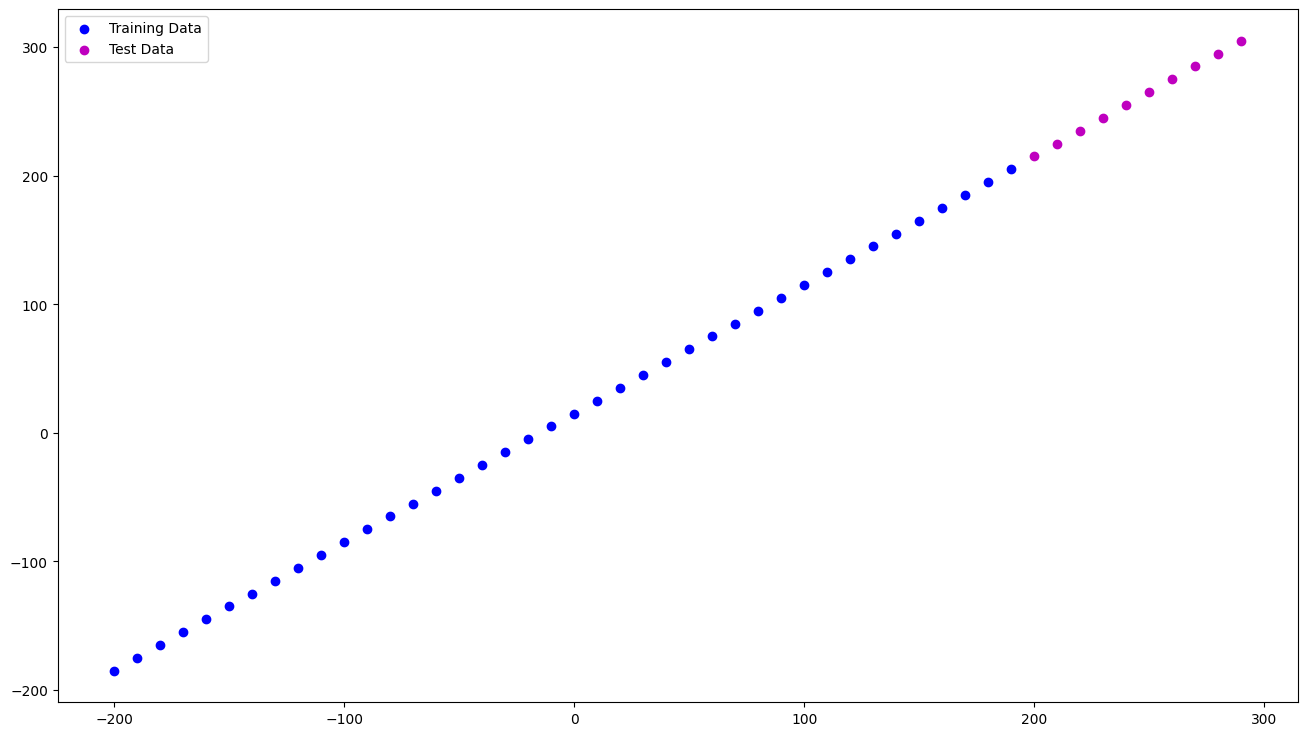

In [17]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c='b',label = 'Training Data')
plt.scatter(X_test,y_test,c= 'm',label = 'Test Data')
plt.legend()
plt.show()

### Visualising the model



In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(lr= 0.0001),
              metrics = ['mae'])

model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs = 100,batch_size = 10)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 95.8177 - mae: 95.8177
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 81.7248 - mae: 81.7248
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 67.7281 - mae: 67.7281
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 51.1924 - mae: 51.1924
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 31.7480 - mae: 31.7480
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 20.2167 - mae: 20.2167
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 11.8990 - mae: 11.8990
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 13.1284 - mae: 13.1284
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 10.1841 - mae: 10.1841
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 7.5244 - mae: 7.5244
Epoch 11/100
4/4 [==============================] - 0s 4ms/st

In [19]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 58ms/step


In [20]:
predictions

array([[223.55074],
       [234.46986],
       [245.38899],
       [256.30814],
       [267.22723],
       [278.14777],
       [289.0701 ],
       [299.99237],
       [310.9146 ],
       [321.83694]], dtype=float32)

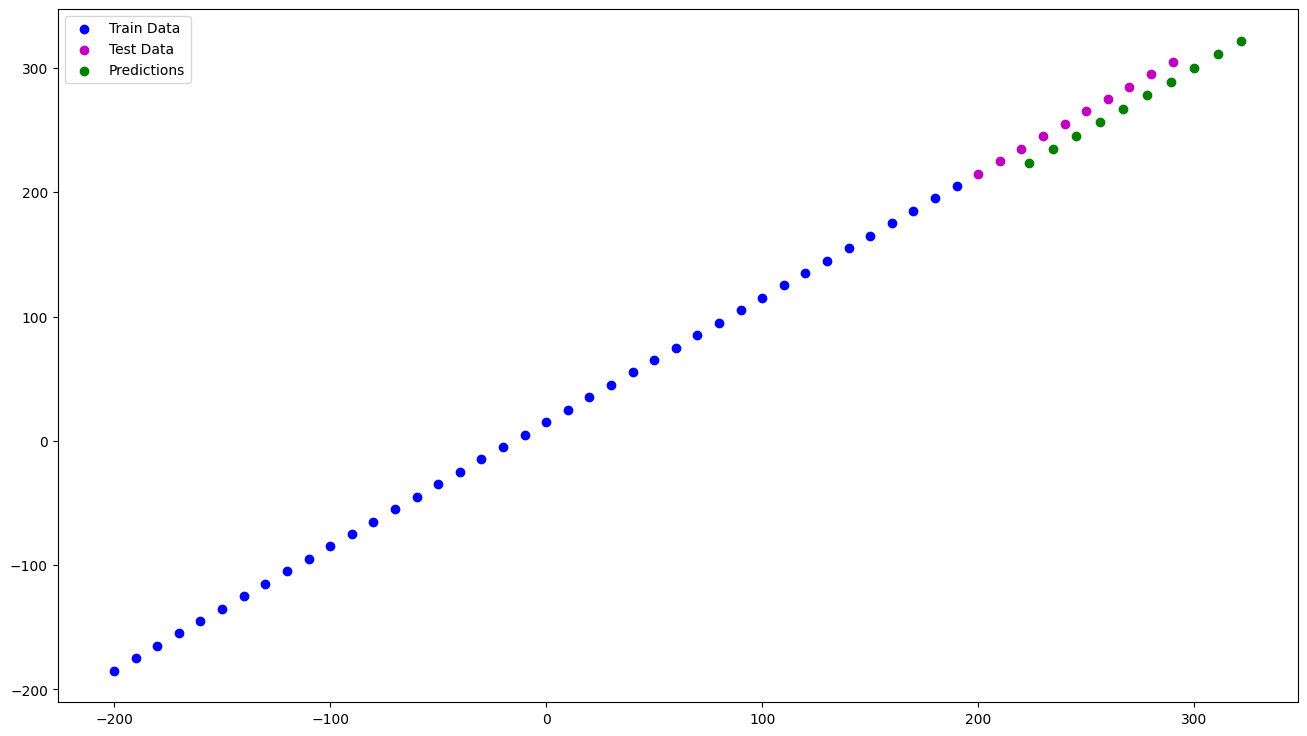

In [21]:
plt.figure(figsize = (16,9))
plt.scatter(X_train,y_train,c= 'b',label = 'Train Data')
plt.scatter(X_test,y_test,c= 'm',label= 'Test Data')
plt.scatter(predictions,predictions,c ='g',label= 'Predictions')
plt.legend()
plt.show()

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (10, 100)                 200       
                                                                 
 dense_9 (Dense)             (10, 100)                 10100     
                                                                 
 dense_10 (Dense)            (10, 100)                 10100     
                                                                 
 dense_11 (Dense)            (10, 1)                   101       
                                                                 
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


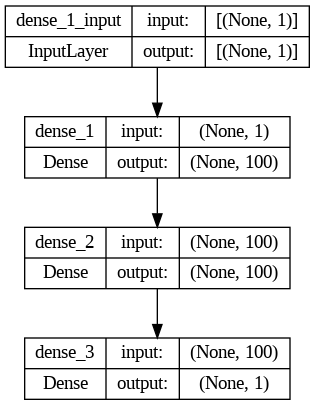

In [36]:
#another way to visualise our model
import plot_model
from tensorflow.keras.utils import plot_model

plot_model(model = improved_model,show_shapes=1,show_dtype=False)

In [67]:
  #Let's create a model and get more spesific summary

  #create the model
  summarized_model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100,activation= 'relu',input_shape=[1],name='Input Layer'),
      tf.keras.layers.Dense(150,activation= 'relu'),
      tf.keras.layers.Dense(200,activation= 'relu'),
      tf.keras.layers.Dense(1,name= 'Output Layer')],name='Summarized Model')

  #compile the model
  model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mae'])

  #fit the model
  #model.fit(tf.expand_dims(X_train,axis=-1) ,y_train, epochs= 50)  #if you set the verbose yo don't get the training or something

ValueError: ignored

In [63]:
summarized_model.summary()

ValueError: ignored

In [48]:
np.array(X_train).shape

(40,)

In [57]:
summarized_model.summary()

ValueError: ignored